Importar as bibliotecas necessárias

In [132]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns

# Time library to know how much time things take
import time

# Yahoo Finance library to download the data
import yfinance as yf

# Config fix seed
tf.random.set_seed(99)

Dicionários de performance

In [133]:
multi_val_performance = []
multi_test_performance = []
multi_train_performance = []

Importar dados do arquivo data/0 - asDownloaded/YahooFinance/_All Yahoo Finance Indicators_.csv

In [134]:
# Load the data into a DataFrame
# YFdata = pd.read_csv('data/0 - asDownloaded/YahooFinance/_All Yahoo Finance Indicators_.csv', index_col=0)
YFdata = pd.read_csv('data/2 - processed/Indicators_with_spread.csv', index_col=0)

# Make Date be the index
# YFdata['Date'] = pd.to_datetime(YFdata['Date'])
# YFdata.set_index('Date', inplace=True)

# convert the index to datetime
YFdata.index = pd.to_datetime(YFdata.index)

# Display the first few rows to verify the data
display(YFdata.head())

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread,Kospi - Spread,Minério de Ferro - Spread,Nasdaq - Spread,Nikkei - Spread,Petróleo Brent - Spread,Petróleo WTI - Spread,S&P 500 - Spread,STOXX 600 - Spread,Shanghai SE - Spread
1994-01-03,380.100006,380.100006,373.399994,375.500000,NaN,NaN,NaN,NaN,3756.600098,3764.989990,...,6.700012,NaN,NaN,8.880005,NaN,NaN,NaN,2.580017,NaN,NaN
1994-01-04,400.600006,400.600006,380.100006,380.100006,NaN,NaN,NaN,NaN,3783.899902,3783.899902,...,20.500000,NaN,NaN,3.760010,182.519531,NaN,NaN,2.450012,NaN,NaN
1994-01-05,421.100006,435.700012,400.600006,400.600006,NaN,NaN,NaN,NaN,3798.820068,3798.820068,...,35.100006,NaN,NaN,4.520020,416.640625,NaN,NaN,1.899994,NaN,NaN
1994-01-06,444.200012,446.500000,421.100006,421.100006,NaN,NaN,NaN,NaN,3803.879883,3813.169922,...,25.399994,NaN,NaN,2.960022,235.119141,NaN,NaN,1.980011,NaN,NaN
1994-01-07,476.399994,476.600006,444.200012,444.200012,NaN,NaN,NaN,NaN,3820.770020,3826.389893,...,32.399994,NaN,NaN,5.190002,343.929688,NaN,NaN,3.230011,NaN,NaN


Exibir dados do Yahoo Finance em gráficos

array([<Axes: >], dtype=object)

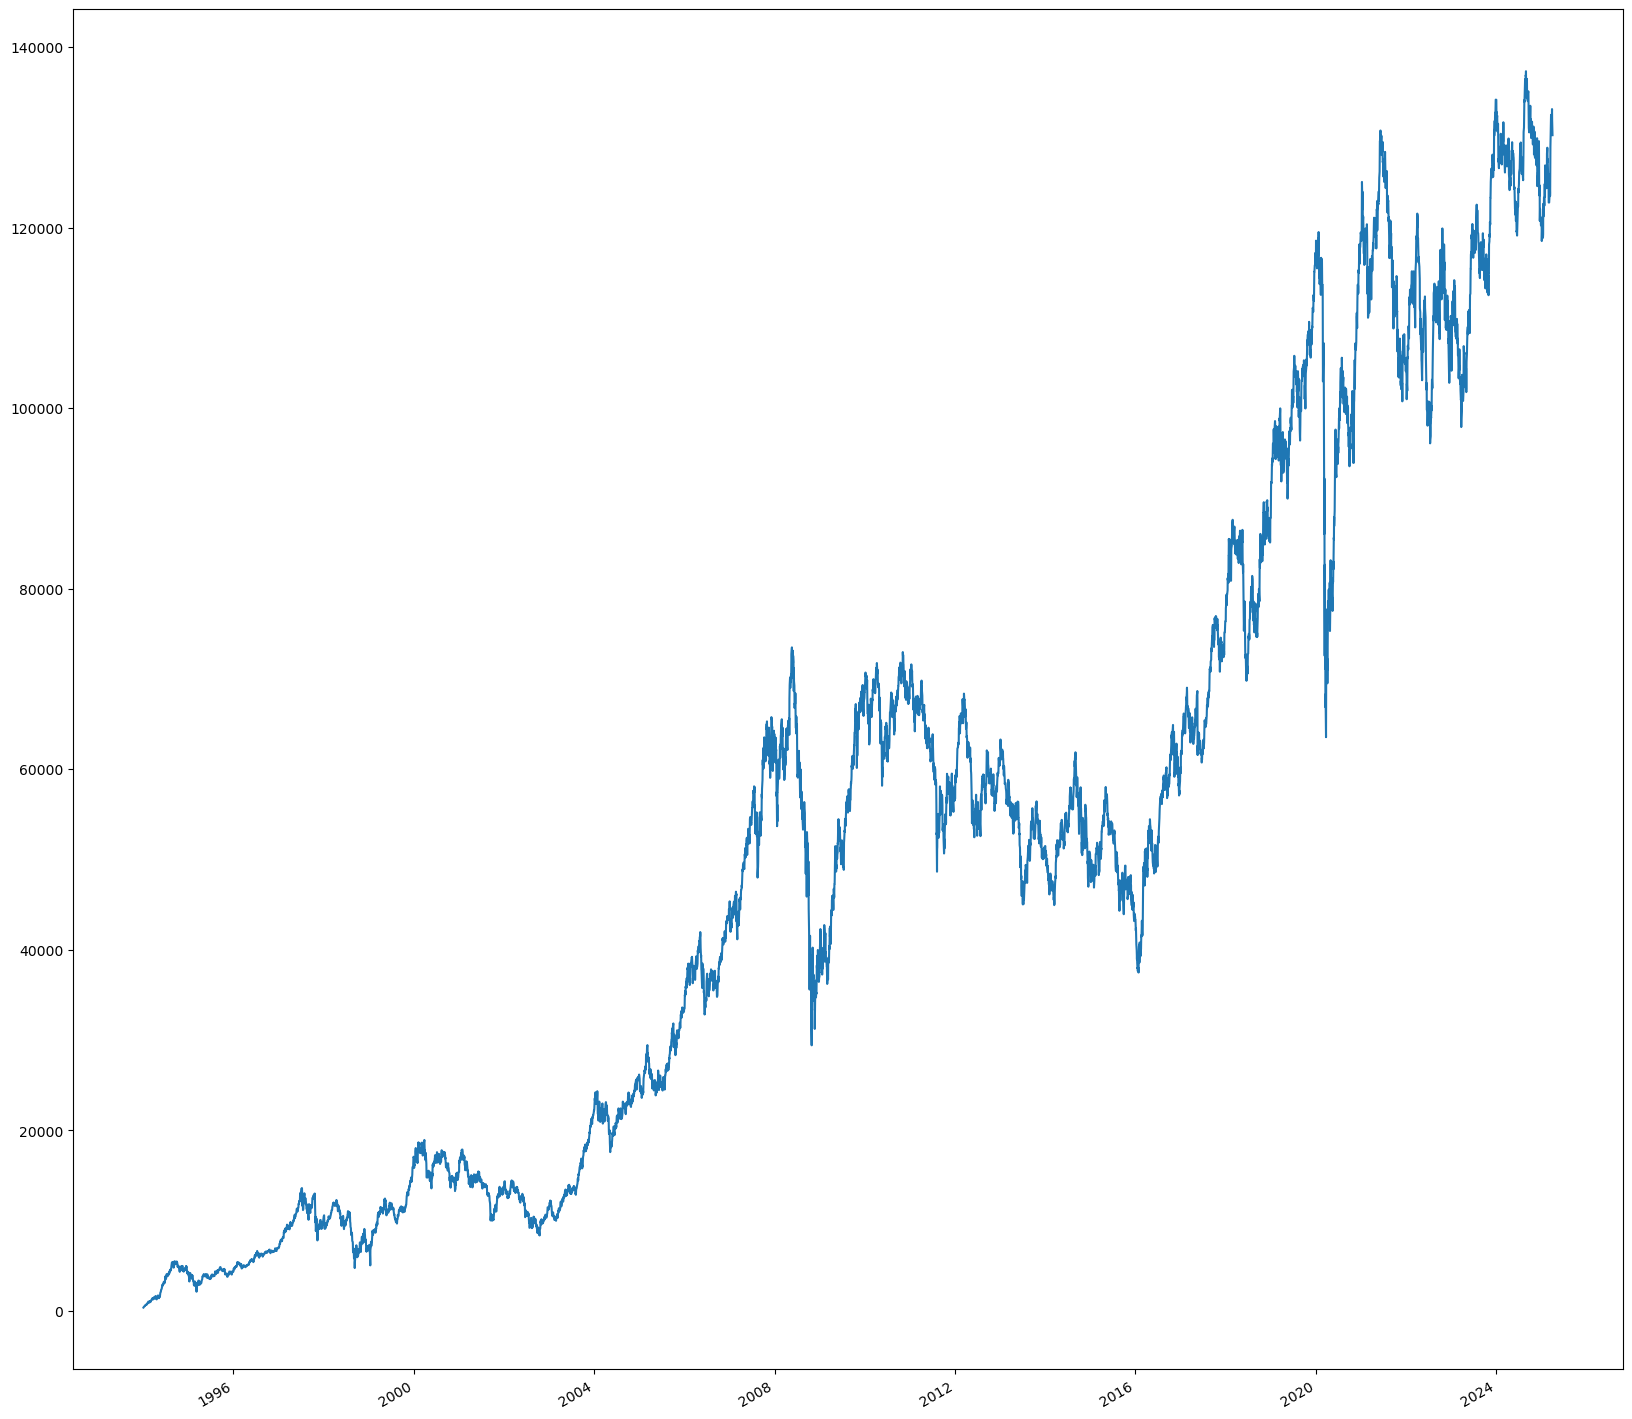

In [135]:
YFdata["IBOVESPA - Close"].plot(subplots=True, figsize=(20, 20))

Buscar o índice do primeiro valor válido

In [136]:
# [5394:]
# YFdata["Open"].apply(pd.Series.first_valid_index)
# YFdata["Low"].apply(pd.Series.first_valid_index)
# YFdata["High"].apply(pd.Series.first_valid_index)
YFdata.apply(pd.Series.first_valid_index)

IBOVESPA - Close          1994-01-03
IBOVESPA - High           1994-01-03
IBOVESPA - Low            1994-01-03
IBOVESPA - Open           1994-01-03
Dólar - Close             2003-12-01
                             ...    
Petróleo Brent - Spread   2007-07-30
Petróleo WTI - Spread     2000-08-23
S&P 500 - Spread          1994-01-03
STOXX 600 - Spread        2004-04-26
Shanghai SE - Spread      1997-07-02
Length: 100, dtype: datetime64[ns]

Criar DataFrame com os dados válidos (a partir do primeiro valor válido) e preencher as lacunas com o valor válido anterior (valor em i=8 inválido e i=7 válido, i=8 recebe o mesmo valor de i=7)

In [137]:
# DataFrame = YFdata[5394:].copy() # 2014-09-17 inicio BTC
YFdata = YFdata.ffill()
YFdata = YFdata.fillna(0)
# DataFrame = YFdata[260:5865].copy() # 02 de janeiro de 1995 até 31 de dezembro de 2015
# DataFrame = YFdata[1728:].copy() # 2000-08-23 inicio CL=F (petróleo WTI)
DataFrame = YFdata[1:].copy() # 1996-01-04 um dia após o inicio no IBOVESPA
# DataFrame = YFdata.copy()
DataFrame = DataFrame.ffill()
DataFrame = DataFrame.fillna(0)
DataFrame

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread,Kospi - Spread,Minério de Ferro - Spread,Nasdaq - Spread,Nikkei - Spread,Petróleo Brent - Spread,Petróleo WTI - Spread,S&P 500 - Spread,STOXX 600 - Spread,Shanghai SE - Spread
1994-01-04,400.600006,400.600006,380.100006,380.100006,0.0000,0.0000,0.000000,0.0000,3783.899902,3783.899902,...,20.500000,0.000000,0.0,3.760010,182.519531,0.000000,0.000000,2.450012,0.000000,0.000000
1994-01-05,421.100006,435.700012,400.600006,400.600006,0.0000,0.0000,0.000000,0.0000,3798.820068,3798.820068,...,35.100006,0.000000,0.0,4.520020,416.640625,0.000000,0.000000,1.899994,0.000000,0.000000
1994-01-06,444.200012,446.500000,421.100006,421.100006,0.0000,0.0000,0.000000,0.0000,3803.879883,3813.169922,...,25.399994,0.000000,0.0,2.960022,235.119141,0.000000,0.000000,1.980011,0.000000,0.000000
1994-01-07,476.399994,476.600006,444.200012,444.200012,0.0000,0.0000,0.000000,0.0000,3820.770020,3826.389893,...,32.399994,0.000000,0.0,5.190002,343.929688,0.000000,0.000000,3.230011,0.000000,0.000000
1994-01-10,495.399994,501.500000,476.399994,476.399994,0.0000,0.0000,0.000000,0.0000,3865.510010,3865.510010,...,25.100006,0.000000,0.0,4.570007,380.541016,0.000000,0.000000,5.720001,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-25,132068.000000,133471.000000,131325.000000,131327.000000,5.7608,5.7935,5.673147,5.7608,42587.500000,42696.609375,...,2146.000000,41.889893,0.0,110.710938,429.386719,1.070000,1.160004,26.530273,5.229980,18.942139
2025-03-26,132520.000000,132984.000000,132068.000000,132069.000000,5.6984,5.7410,5.691010,5.6984,42454.789062,42821.828125,...,916.000000,31.099854,0.0,399.291016,347.410156,1.080002,1.160004,89.209961,5.180054,16.676025
2025-03-27,133149.000000,133904.000000,132479.000000,132522.000000,5.7335,5.7690,5.722200,5.7335,42299.699219,42523.839844,...,1425.000000,29.620117,0.0,244.218750,302.308594,0.839996,0.849998,61.339844,4.429993,42.860840
2025-03-28,131902.000000,133143.000000,131315.000000,133143.000000,5.7393,5.7801,5.732447,5.7393,41583.898438,42258.148438,...,1828.000000,43.369873,0.0,480.218750,495.019531,1.089996,1.219994,113.470215,6.029968,28.971924


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

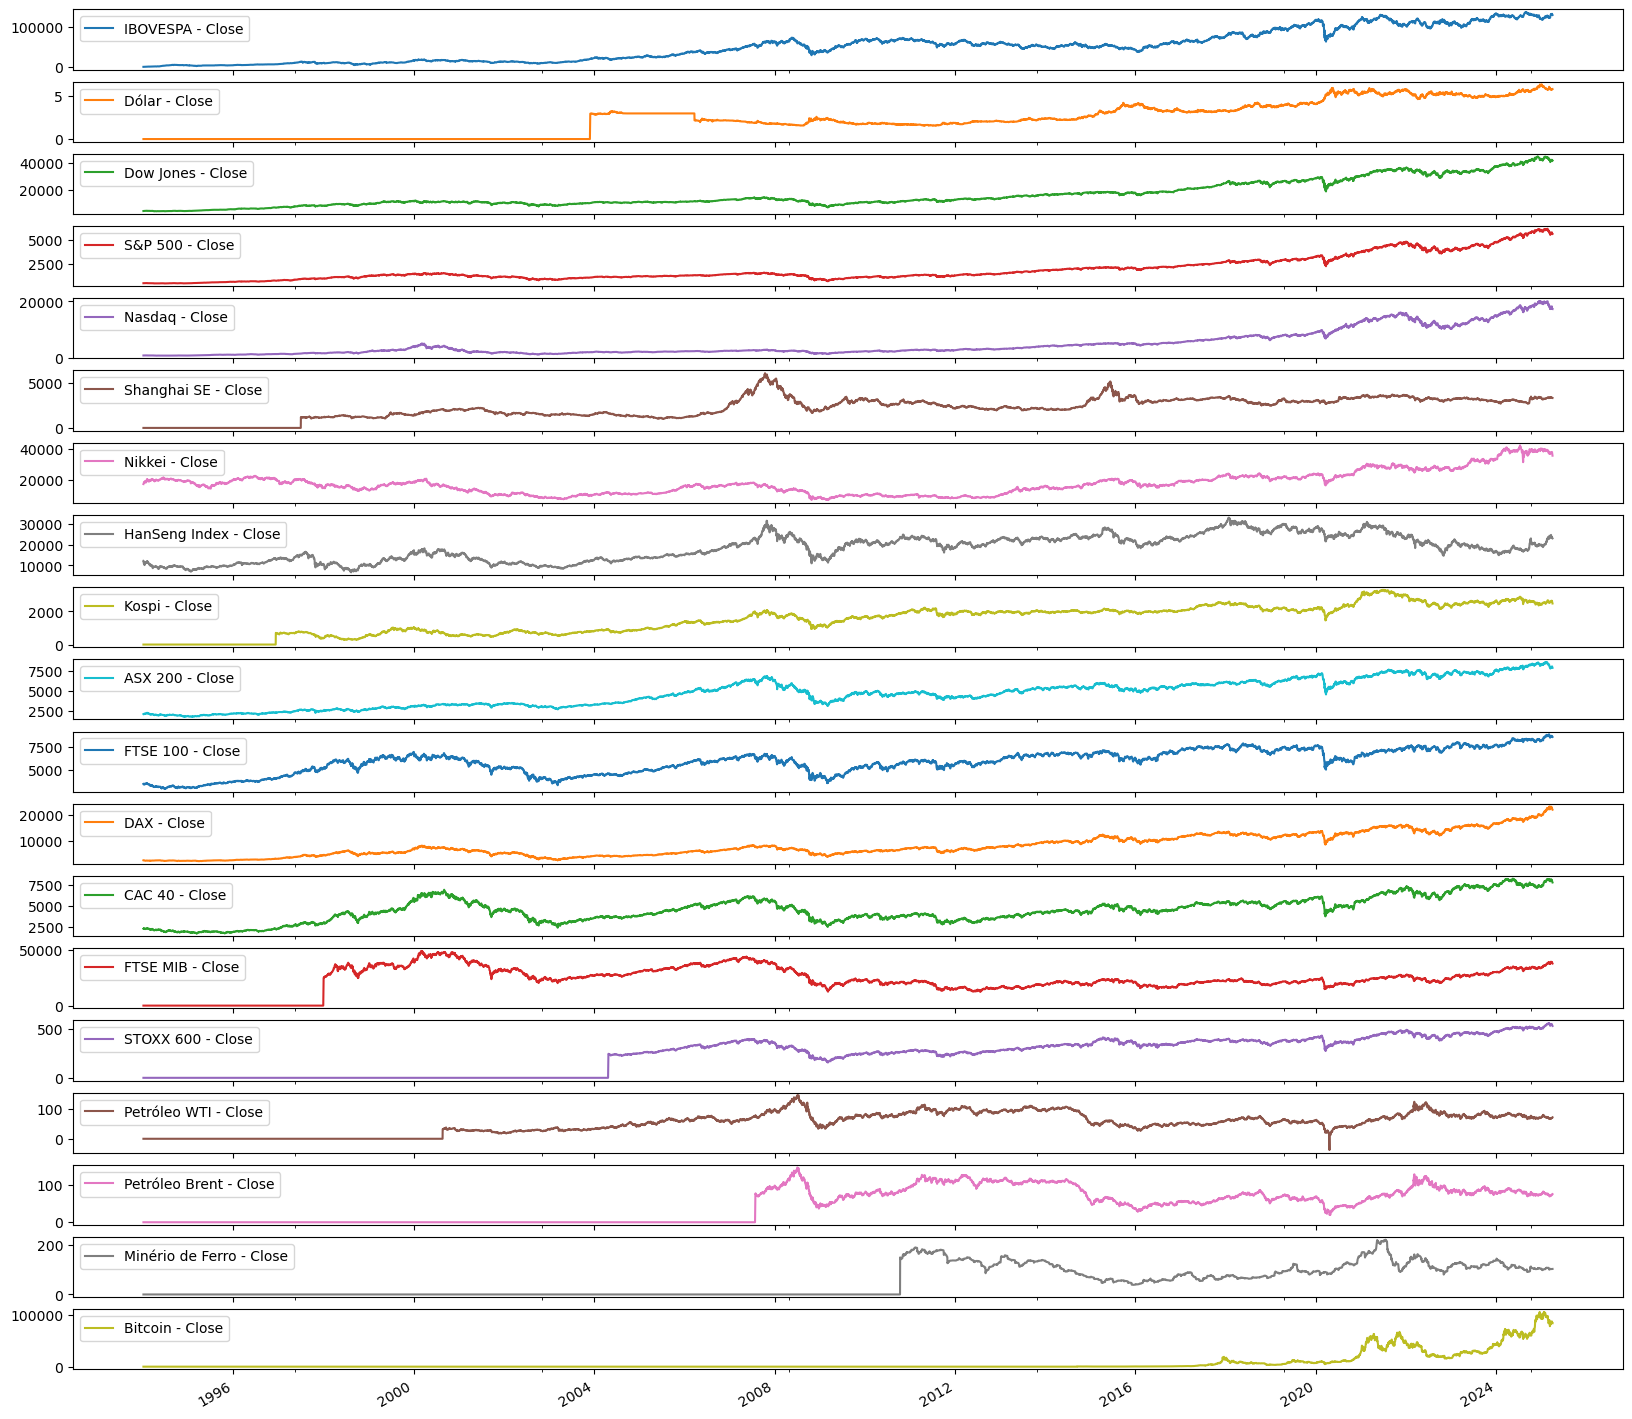

In [138]:
DataFrame[[col for col in DataFrame.columns if "close" in col.lower()]].plot(subplots=True, figsize=(20, 20))

In [139]:
# drop empty columns
DataFrame = DataFrame.dropna(axis=1, how='all')
# drop columns with all zeros
DataFrame = DataFrame.loc[:, (DataFrame != 0).any(axis=0)]

In [140]:
# create new columns with the variation of each indicator
for col in DataFrame.columns:
    if "close" in col.lower():
        DataFrame[col + " %"] = DataFrame[col].pct_change()
        DataFrame[col + " %"] = DataFrame[col + " %"].fillna(0)
        DataFrame[col + " %"] = DataFrame[col + " %"].replace([np.inf, -np.inf], 0)
        DataFrame[col + " %"] = DataFrame[col + " %"].astype(np.float32)

Normalizar os dados usando MinMaxScaler

In [141]:
normalization_values = DataFrame.describe().T[['min', 'max']]
df_min_max_scaled = (DataFrame - normalization_values['min']) / (normalization_values['max'] - normalization_values['min'])

# Save normalization values and normalized data
normalization_values.to_csv("data/2 - processed/normalization_values_Jupyter.csv", index=True)
df_min_max_scaled.to_csv("data/2 - processed/normalized_data_Jupyter.csv", index=True)
# view normalized data
display(df_min_max_scaled)


,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,ASX 200 - Close %,FTSE 100 - Close %,DAX - Close %,CAC 40 - Close %,FTSE MIB - Close %,STOXX 600 - Close %,Petróleo WTI - Close %,Petróleo Brent - Close %,Minério de Ferro - Close %,Bitcoin - Close %
1994-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004600,0.003605,...,0.580810,0.524989,0.517695,0.523464,0.595729,0.537731,0.890398,0.537262,0.541125,0.595506
1994-01-05,0.000150,0.000256,0.000150,0.000150,0.000000,0.000000,0.000000,0.000000,0.004961,0.003965,...,0.627798,0.483486,0.468361,0.477157,0.595729,0.537731,0.890398,0.537262,0.541125,0.595506
1994-01-06,0.000318,0.000335,0.000301,0.000299,0.000000,0.000000,0.000000,0.000000,0.005083,0.004311,...,0.599627,0.558993,0.512026,0.571796,0.595729,0.537731,0.890398,0.537262,0.541125,0.595506
1994-01-07,0.000554,0.000554,0.000470,0.000468,0.000000,0.000000,0.000000,0.000000,0.005490,0.004630,...,0.539653,0.585995,0.525925,0.584374,0.595729,0.537731,0.890398,0.537262,0.541125,0.595506
1994-01-10,0.000692,0.000736,0.000707,0.000703,0.000000,0.000000,0.000000,0.000000,0.006571,0.005574,...,0.614076,0.517423,0.517791,0.541387,0.595729,0.537731,0.890398,0.537262,0.541125,0.595506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-25,0.961473,0.970832,0.960824,0.956034,0.914413,0.903667,0.917761,0.914703,0.941417,0.942638,...,0.585035,0.539409,0.565290,0.569311,0.632932,0.568969,0.889935,0.537865,0.540324,0.595008
2025-03-26,0.964774,0.967279,0.966276,0.961451,0.904508,0.895478,0.920651,0.904795,0.938213,0.945660,...,0.623405,0.539366,0.468136,0.482496,0.566510,0.505005,0.893140,0.560477,0.542995,0.585051
2025-03-27,0.969367,0.973991,0.969292,0.964758,0.910079,0.899846,0.925697,0.910368,0.934469,0.938469,...,0.558352,0.511932,0.488008,0.501923,0.599423,0.517070,0.891526,0.544422,0.544062,0.600599
2025-03-28,0.960261,0.968439,0.960751,0.969292,0.911000,0.901577,0.927354,0.911289,0.917188,0.932057,...,0.590578,0.520978,0.477180,0.483959,0.563326,0.501627,0.888067,0.525366,0.542992,0.543608


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

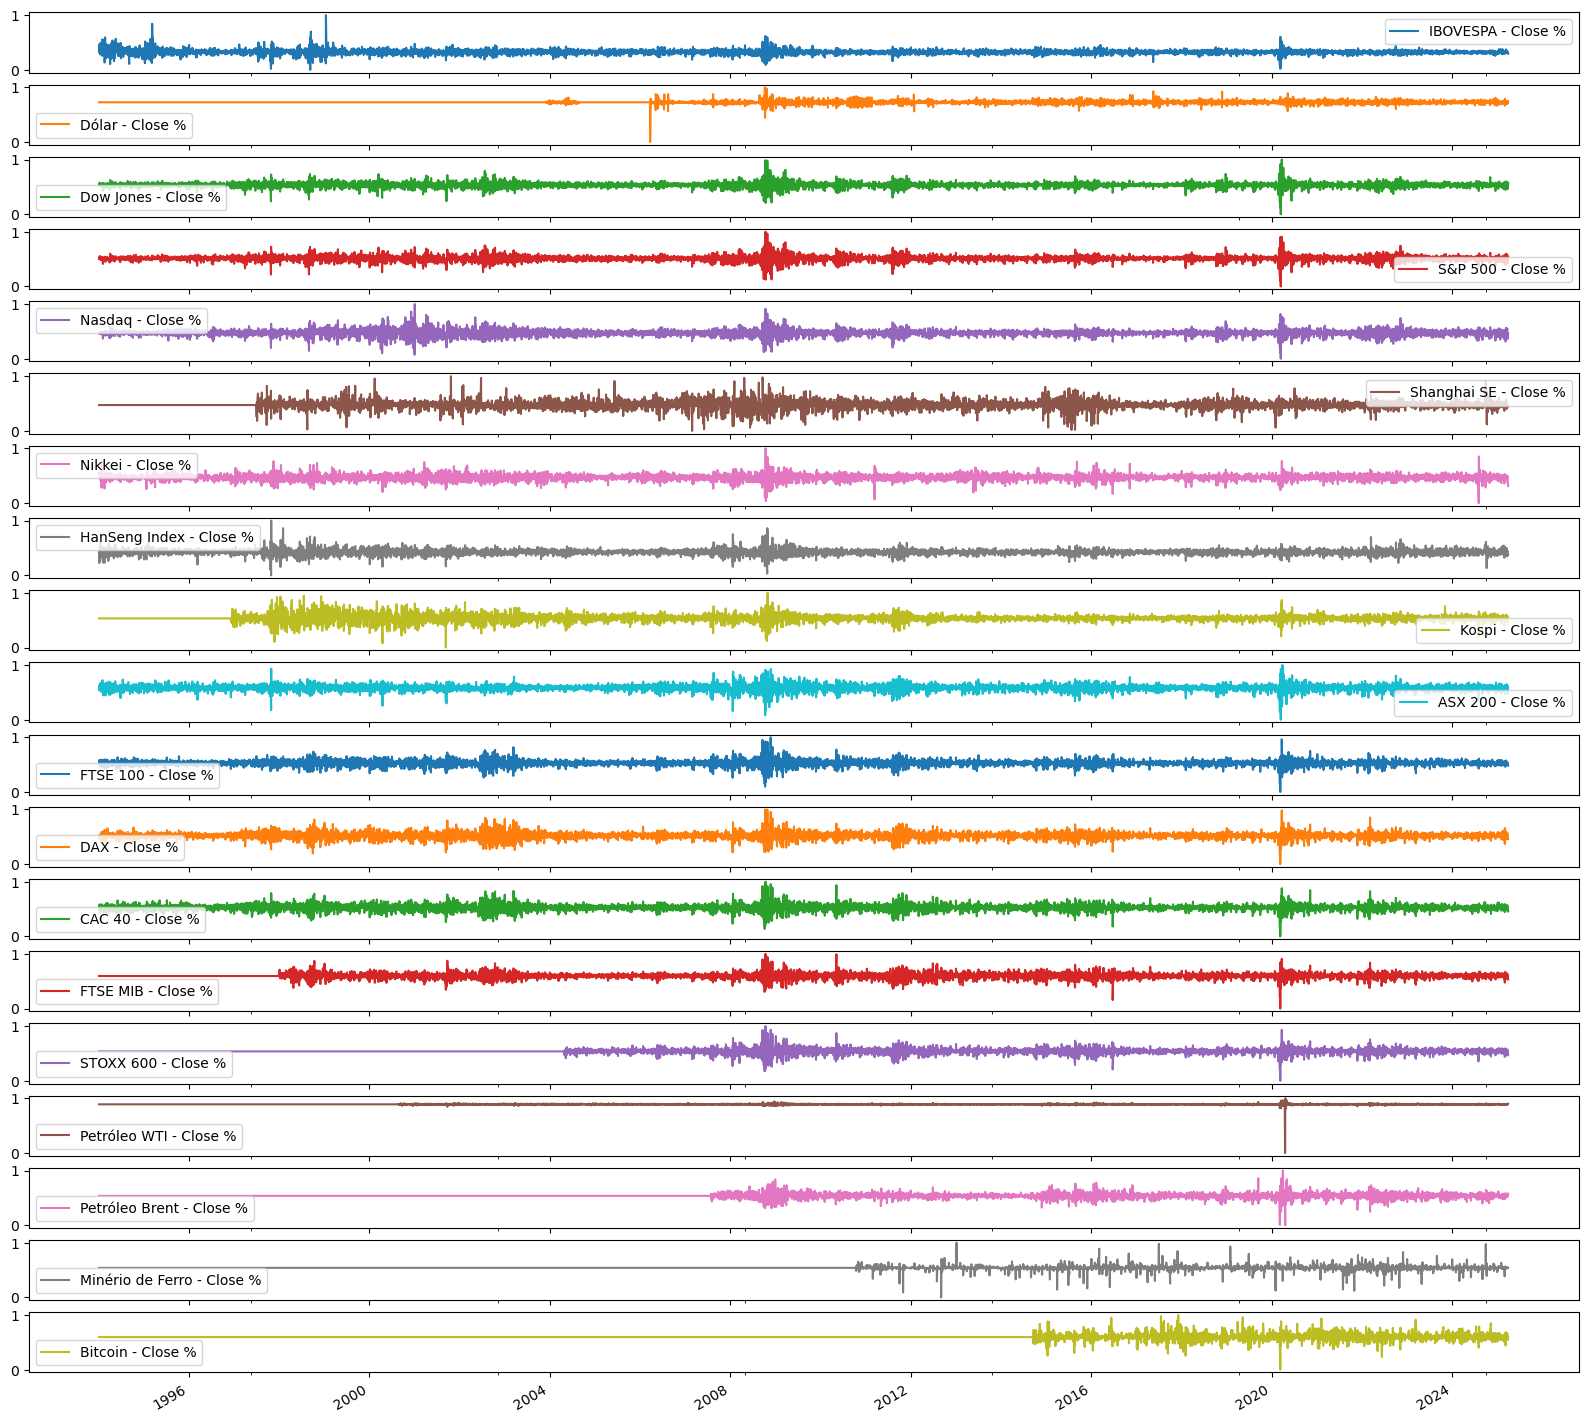

In [142]:
df_min_max_scaled[[col for col in df_min_max_scaled if " %" in col.lower()]].plot(subplots=True, figsize=(20, 20))

Verificar correlação dos dados

In [143]:
df_min_max_scaled.corr()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,ASX 200 - Close %,FTSE 100 - Close %,DAX - Close %,CAC 40 - Close %,FTSE MIB - Close %,STOXX 600 - Close %,Petróleo WTI - Close %,Petróleo Brent - Close %,Minério de Ferro - Close %,Bitcoin - Close %
IBOVESPA - Close,1.000000,0.999873,0.999894,0.999707,0.893601,0.893501,0.893015,0.893074,0.922586,0.922598,...,0.002731,0.002803,0.005893,0.003587,0.012198,0.014841,-0.002131,0.017713,0.011069,0.039152
IBOVESPA - High,0.999873,1.000000,0.999833,0.999880,0.894238,0.894188,0.893651,0.893705,0.922210,0.922317,...,0.000237,-0.000856,0.002676,0.000159,0.008735,0.010615,-0.003761,0.014278,0.010896,0.037307
IBOVESPA - Low,0.999894,0.999833,1.000000,0.999827,0.892964,0.892852,0.892405,0.892434,0.923080,0.923109,...,0.002597,0.001041,0.004364,0.001927,0.010592,0.012913,-0.002464,0.016089,0.011122,0.038144
IBOVESPA - Open,0.999707,0.999880,0.999827,1.000000,0.893459,0.893429,0.892916,0.892915,0.922510,0.922625,...,-0.002140,-0.006071,-0.002068,-0.004937,0.003635,0.004626,-0.005125,0.010995,0.010277,0.035954
Dólar - Close,0.893601,0.894238,0.892964,0.893459,1.000000,0.999938,0.999930,0.999943,0.887097,0.887319,...,0.001936,0.002365,0.004839,0.003940,0.011013,0.012850,-0.011291,0.009972,0.010479,0.043402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STOXX 600 - Close %,0.014841,0.010615,0.012913,0.004626,0.012850,0.011400,0.012574,0.014384,0.014843,0.011686,...,0.339316,0.733295,0.694163,0.746428,0.746893,1.000000,0.141797,0.308896,0.049325,0.090458
Petróleo WTI - Close %,-0.002131,-0.003761,-0.002464,-0.005125,-0.011291,-0.011824,-0.011628,-0.010948,-0.004858,-0.006026,...,0.082508,0.123588,0.089625,0.105579,0.115521,0.141797,1.000000,0.494268,0.026122,0.031530
Petróleo Brent - Close %,0.017713,0.014278,0.016089,0.010995,0.009972,0.008971,0.009419,0.010642,0.010548,0.008617,...,0.133745,0.266169,0.198446,0.231979,0.254120,0.308896,0.494268,1.000000,0.064935,0.046020
Minério de Ferro - Close %,0.011069,0.010896,0.011122,0.010277,0.010479,0.010391,0.010252,0.010419,0.006973,0.006967,...,0.033743,0.046311,0.032591,0.038061,0.035874,0.049325,0.026122,0.064935,1.000000,-0.007198


In [144]:
# calculate the correlation matrix on the numeric columns
corrs = df_min_max_scaled.corr()["IBOVESPA - Close %"][:]

# sort the correlations in descending order
corrs = corrs.sort_values(ascending=False)

# print all correlations (with for loop)
for col in corrs.index:
    print(f"{col}: {corrs[col]:.2f}")

IBOVESPA - Close %: 1.00
S&P 500 - Close %: 0.50
Dow Jones - Close %: 0.48
Nasdaq - Close %: 0.45
FTSE 100 - Close %: 0.38
CAC 40 - Close %: 0.37
DAX - Close %: 0.37
FTSE MIB - Close %: 0.33
STOXX 600 - Close %: 0.32
HanSeng Index - Close %: 0.19
Petróleo Brent - Close %: 0.19
ASX 200 - Close %: 0.17
Kospi - Close %: 0.16
Nikkei - Close %: 0.13
Petróleo WTI - Close %: 0.08
Shanghai SE - Close %: 0.07
Bitcoin - Close %: 0.06
Minério de Ferro - Close %: 0.02
Nikkei - Spread: 0.02
INPC: 0.01
IPCA: 0.00
Nikkei - Close: 0.00
Nikkei - High: -0.00
Nikkei - Low: -0.00
Nikkei - Open: -0.00
Minério de Ferro - Spread: -0.00
Bitcoin - Close: -0.01
Bitcoin - Low: -0.01
Bitcoin - High: -0.01
Bitcoin - Open: -0.02
Meta Selic: -0.02
Nasdaq - Close: -0.02
Taxa acumulada no período: -0.02
Bitcoin - Spread: -0.02
Nasdaq - Low: -0.02
Nasdaq - High: -0.02
S&P 500 - Close: -0.02
Nasdaq - Open: -0.02
Dólar - Open: -0.02
IBOVESPA - Close: -0.02
Dólar - Close: -0.03
S&P 500 - Low: -0.03
Dow Jones - Close: -0.0

Montar o datasets X e Y para o modelo LSTM

In [145]:
df_min_max_scaled_cp = df_min_max_scaled.copy()
df_min_max_scaled_cp.reset_index(inplace=True)
# remove the first column (Date)
# df_min_max_scaled_cp.drop(columns=['Date'], inplace=True)
# remove the first column (index)
df_min_max_scaled_cp.drop(columns=['index'], inplace=True)

In [146]:
df_min_max_scaled_cp.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,ASX 200 - Close %,FTSE 100 - Close %,DAX - Close %,CAC 40 - Close %,FTSE MIB - Close %,STOXX 600 - Close %,Petróleo WTI - Close %,Petróleo Brent - Close %,Minério de Ferro - Close %,Bitcoin - Close %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.580810,0.524989,0.517695,0.523464,0.595729,0.537731,0.890398,0.537262,0.541125,0.595506
1,0.000150,0.000256,0.000150,0.000150,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.627798,0.483486,0.468361,0.477157,0.595729,0.537731,0.890398,0.537262,0.541125,0.595506
2,0.000318,0.000335,0.000301,0.000299,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.599627,0.558993,0.512026,0.571796,0.595729,0.537731,0.890398,0.537262,0.541125,0.595506
3,0.000554,0.000554,0.000470,0.000468,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.539653,0.585995,0.525925,0.584374,0.595729,0.537731,0.890398,0.537262,0.541125,0.595506
4,0.000692,0.000736,0.000707,0.000703,0.0,0.0,0.0,0.0,0.006571,0.005574,...,0.614076,0.517423,0.517791,0.541387,0.595729,0.537731,0.890398,0.537262,0.541125,0.595506


In [147]:
# # Filtrar colunas que contêm "High" e "Low"
# high_columns = [col for col in df_min_max_scaled_cp.columns if "High" in col]
# low_columns = [col for col in df_min_max_scaled_cp.columns if "Low" in col]

# # Garantir que as colunas "High" e "Low" correspondem ao mesmo indicador
# # Isso assume que as colunas "High" e "Low" têm o mesmo sufixo após " - "
# for high_col, low_col in zip(sorted(high_columns), sorted(low_columns)):
#     # Extrair o nome do indicador (sufixo após " - ")
#     indicator_name = high_col.split(" - ")[0]
    
#     # Calcular o spread e adicionar ao DataFrame
#     df_min_max_scaled_cp[f"{indicator_name} - Spread"] = df_min_max_scaled_cp[high_col] - df_min_max_scaled_cp[low_col]

In [148]:
df_min_max_scaled_cp.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,ASX 200 - Close %,FTSE 100 - Close %,DAX - Close %,CAC 40 - Close %,FTSE MIB - Close %,STOXX 600 - Close %,Petróleo WTI - Close %,Petróleo Brent - Close %,Minério de Ferro - Close %,Bitcoin - Close %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.580810,0.524989,0.517695,0.523464,0.595729,0.537731,0.890398,0.537262,0.541125,0.595506
1,0.000150,0.000256,0.000150,0.000150,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.627798,0.483486,0.468361,0.477157,0.595729,0.537731,0.890398,0.537262,0.541125,0.595506
2,0.000318,0.000335,0.000301,0.000299,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.599627,0.558993,0.512026,0.571796,0.595729,0.537731,0.890398,0.537262,0.541125,0.595506
3,0.000554,0.000554,0.000470,0.000468,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.539653,0.585995,0.525925,0.584374,0.595729,0.537731,0.890398,0.537262,0.541125,0.595506
4,0.000692,0.000736,0.000707,0.000703,0.0,0.0,0.0,0.0,0.006571,0.005574,...,0.614076,0.517423,0.517791,0.541387,0.595729,0.537731,0.890398,0.537262,0.541125,0.595506


In [149]:
# importar dados de data/2 - processed/normalized_data.csv
imported_df = pd.read_csv('data/2 - processed/normalized_data.csv', index_col=0)
# order on index
imported_df = imported_df.sort_index()
# turn index into column
imported_df.reset_index(inplace=True)
# remove the first column (index)
imported_df.drop(columns=['index'], inplace=True)
imported_df.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


# differentiate between the two dataframes

In [150]:
# make imported_df has the same columns as df_min_max_scaled_cp
# imported_df = imported_df[df_min_max_scaled_cp.columns]

In [151]:
# diferences between the two DataFrames
print("Original Columns: ", df_min_max_scaled_cp.columns)
print("Imported Columns: ", imported_df.columns)
# print indexes
print("Original Index: ", df_min_max_scaled_cp.index)
print("Imported Index: ", imported_df.index)

Original Columns:  Index(['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low',
       'IBOVESPA - Open', 'Dólar - Close', 'Dólar - High', 'Dólar - Low',
       'Dólar - Open', 'Dow Jones - Close', 'Dow Jones - High',
       ...
       'ASX 200 - Close %', 'FTSE 100 - Close %', 'DAX - Close %',
       'CAC 40 - Close %', 'FTSE MIB - Close %', 'STOXX 600 - Close %',
       'Petróleo WTI - Close %', 'Petróleo Brent - Close %',
       'Minério de Ferro - Close %', 'Bitcoin - Close %'],
      dtype='object', length=119)
Imported Columns:  Index(['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low',
       'IBOVESPA - Open', 'Dólar - Close', 'Dólar - High', 'Dólar - Low',
       'Dólar - Open', 'Dow Jones - Close', 'Dow Jones - High',
       ...
       'IBOVESPA - Spread %', 'Kospi - Spread %',
       'Minério de Ferro - Spread %', 'Nasdaq - Spread %', 'Nikkei - Spread %',
       'Petróleo Brent - Spread %', 'Petróleo WTI - Spread %',
       'S&P 500 - Spread %', 'STOXX 600 - Spread %

In [152]:
df_min_max_scaled_cp

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,ASX 200 - Close %,FTSE 100 - Close %,DAX - Close %,CAC 40 - Close %,FTSE MIB - Close %,STOXX 600 - Close %,Petróleo WTI - Close %,Petróleo Brent - Close %,Minério de Ferro - Close %,Bitcoin - Close %
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004600,0.003605,...,0.580810,0.524989,0.517695,0.523464,0.595729,0.537731,0.890398,0.537262,0.541125,0.595506
1,0.000150,0.000256,0.000150,0.000150,0.000000,0.000000,0.000000,0.000000,0.004961,0.003965,...,0.627798,0.483486,0.468361,0.477157,0.595729,0.537731,0.890398,0.537262,0.541125,0.595506
2,0.000318,0.000335,0.000301,0.000299,0.000000,0.000000,0.000000,0.000000,0.005083,0.004311,...,0.599627,0.558993,0.512026,0.571796,0.595729,0.537731,0.890398,0.537262,0.541125,0.595506
3,0.000554,0.000554,0.000470,0.000468,0.000000,0.000000,0.000000,0.000000,0.005490,0.004630,...,0.539653,0.585995,0.525925,0.584374,0.595729,0.537731,0.890398,0.537262,0.541125,0.595506
4,0.000692,0.000736,0.000707,0.000703,0.000000,0.000000,0.000000,0.000000,0.006571,0.005574,...,0.614076,0.517423,0.517791,0.541387,0.595729,0.537731,0.890398,0.537262,0.541125,0.595506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,0.961473,0.970832,0.960824,0.956034,0.914413,0.903667,0.917761,0.914703,0.941417,0.942638,...,0.585035,0.539409,0.565290,0.569311,0.632932,0.568969,0.889935,0.537865,0.540324,0.595008
7988,0.964774,0.967279,0.966276,0.961451,0.904508,0.895478,0.920651,0.904795,0.938213,0.945660,...,0.623405,0.539366,0.468136,0.482496,0.566510,0.505005,0.893140,0.560477,0.542995,0.585051
7989,0.969367,0.973991,0.969292,0.964758,0.910079,0.899846,0.925697,0.910368,0.934469,0.938469,...,0.558352,0.511932,0.488008,0.501923,0.599423,0.517070,0.891526,0.544422,0.544062,0.600599
7990,0.960261,0.968439,0.960751,0.969292,0.911000,0.901577,0.927354,0.911289,0.917188,0.932057,...,0.590578,0.520978,0.477180,0.483959,0.563326,0.501627,0.888067,0.525366,0.542992,0.543608


In [153]:
imported_df

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003941,0.003148,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000150,0.000150,0.000049,0.000034,0.000000,0.000000,0.000000,0.000000,0.004600,0.003605,...,0.036606,0.000000,0.0,0.029525,0.000000,0.000000,0.000000,0.084905,0.000000,0.000000
2,0.000299,0.000406,0.000200,0.000183,0.000000,0.000000,0.000000,0.000000,0.004961,0.003965,...,0.020442,0.000000,0.0,0.119266,0.201590,0.000000,0.000000,0.065165,0.000000,0.000000
3,0.000468,0.000484,0.000350,0.000333,0.000000,0.000000,0.000000,0.000000,0.005083,0.004311,...,0.008583,0.000000,0.0,0.056198,0.049836,0.000000,0.000000,0.095393,0.000000,0.000000
4,0.000703,0.000704,0.000519,0.000502,0.000000,0.000000,0.000000,0.000000,0.005490,0.004630,...,0.015204,0.000000,0.0,0.182793,0.129181,0.000000,0.000000,0.162195,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7988,0.961479,0.970836,0.960826,0.956035,0.886872,0.873105,0.890824,0.887245,0.941417,0.942638,...,0.017879,0.194074,0.0,0.051859,0.162612,0.436438,0.019012,0.029956,0.091002,0.009576
7989,0.964779,0.967284,0.966278,0.961452,0.873780,0.862318,0.894660,0.874147,0.938213,0.945660,...,0.005023,0.054210,0.0,0.396368,0.071451,0.438187,0.022722,0.358482,0.092202,0.014956
7990,0.969371,0.973995,0.969294,0.964760,0.881145,0.868071,0.901358,0.881515,0.934469,0.938469,...,0.018564,0.075006,0.0,0.051215,0.076847,0.436367,0.016503,0.055198,0.079611,0.043895
7991,0.960267,0.968444,0.960753,0.969293,0.882361,0.870351,0.903559,0.882732,0.917188,0.932057,...,0.015291,0.125686,0.0,0.207338,0.144607,0.440452,0.032850,0.186974,0.126712,0.011456


In [154]:
# Create new DataFrame with only colunas with "Spread" or "Close"
df_min_max_scaled_spread = df_min_max_scaled_cp[
    [col for col in df_min_max_scaled_cp.columns if "Spread" in col or "Close" in col]
].copy()
df_min_max_scaled_spread.head()

,IBOVESPA - Close,Dólar - Close,Dow Jones - Close,S&P 500 - Close,Nasdaq - Close,Shanghai SE - Close,Nikkei - Close,HanSeng Index - Close,Kospi - Close,ASX 200 - Close,...,ASX 200 - Close %,FTSE 100 - Close %,DAX - Close %,CAC 40 - Close %,FTSE MIB - Close %,STOXX 600 - Close %,Petróleo WTI - Close %,Petróleo Brent - Close %,Minério de Ferro - Close %,Bitcoin - Close %
0,0.000000,0.0,0.004600,0.004903,0.004132,0.0,0.293291,0.209132,0.0,0.049177,...,0.580810,0.524989,0.517695,0.523464,0.595729,0.537731,0.890398,0.537262,0.541125,0.595506
1,0.000150,0.0,0.004961,0.005018,0.004325,0.0,0.305055,0.207879,0.0,0.051628,...,0.627798,0.483486,0.468361,0.477157,0.595729,0.537731,0.890398,0.537262,0.541125,0.595506
2,0.000318,0.0,0.005083,0.004943,0.004447,0.0,0.307856,0.178298,0.0,0.052617,...,0.599627,0.558993,0.512026,0.571796,0.595729,0.537731,0.890398,0.537262,0.541125,0.595506
3,0.000554,0.0,0.005490,0.005430,0.004576,0.0,0.314738,0.163853,0.0,0.050447,...,0.539653,0.585995,0.525925,0.584374,0.595729,0.537731,0.890398,0.537262,0.541125,0.595506
4,0.000692,0.0,0.006571,0.006371,0.004769,0.0,0.323821,0.177645,0.0,0.052189,...,0.614076,0.517423,0.517791,0.541387,0.595729,0.537731,0.890398,0.537262,0.541125,0.595506


In [155]:
# df_x_values = df_min_max_scaled_spread.copy()
# df_x_values = df_min_max_scaled_cp.copy()
df_x_values = imported_df.copy()
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


In [156]:
corr = df_x_values.corr()['IBOVESPA - Close %']
corr = corr.sort_values()
print(corr.to_string())

IPCA %                        -0.104904
INPC %                        -0.104528
IBOVESPA - Spread             -0.090141
Nasdaq - Spread %             -0.083494
FTSE 100 - Spread             -0.077431
CAC 40 - Spread               -0.075797
Taxa acumulada no período %   -0.072398
STOXX 600 - Spread            -0.070673
FTSE MIB - Spread             -0.070577
STOXX 600 - Spread %          -0.070486
CAC 40 - Spread %             -0.069626
FTSE MIB - Spread %           -0.067484
Dow Jones - Spread            -0.067139
S&P 500 - Spread %            -0.065647
S&P 500 - Spread              -0.065500
DAX - Spread                  -0.061319
Dólar - Spread                -0.056498
Nasdaq - Spread               -0.055014
FTSE 100 - Spread %           -0.054914
Petróleo WTI - Spread         -0.054419
Kospi - Spread %              -0.054199
Shanghai SE - Open %          -0.053242
Petróleo WTI - Spread %       -0.052938
PIB %                         -0.052670
Dow Jones - Spread %          -0.050204


In [194]:
corr.index

Index(['IPCA %', 'INPC %', 'IBOVESPA - Spread', 'Nasdaq - Spread %',
       'FTSE 100 - Spread', 'CAC 40 - Spread', 'Taxa acumulada no período %',
       'STOXX 600 - Spread', 'FTSE MIB - Spread', 'STOXX 600 - Spread %',
       ...
       'S&P 500 - Low %', 'DAX - Close %', 'CAC 40 - Close %',
       'FTSE 100 - Close %', 'Nasdaq - Close %', 'Dow Jones - Close %',
       'S&P 500 - Close %', 'IBOVESPA - Low %', 'IBOVESPA - High %',
       'IBOVESPA - Close %'],
      dtype='object', length=200)

In [195]:
# columns = ['IBOVESPA - Close'] + list(corr[abs(corr)<0.60].index)
columns_by_correlation = [index for index in corr.index if abs(corr[index]) > 0.03 and not pd.isna(corr[index])]
# if "IBOVESPA - Close" in columns_by_correlation:
#     columns = columns_by_correlation
# else:
#     columns = ['IBOVESPA - Close'] + columns_by_correlation
columns = columns_by_correlation
print(len(columns))
columns

126


['IPCA %',
 'INPC %',
 'IBOVESPA - Spread',
 'Nasdaq - Spread %',
 'FTSE 100 - Spread',
 'CAC 40 - Spread',
 'Taxa acumulada no período %',
 'STOXX 600 - Spread',
 'FTSE MIB - Spread',
 'STOXX 600 - Spread %',
 'CAC 40 - Spread %',
 'FTSE MIB - Spread %',
 'Dow Jones - Spread',
 'S&P 500 - Spread %',
 'S&P 500 - Spread',
 'DAX - Spread',
 'Dólar - Spread',
 'Nasdaq - Spread',
 'FTSE 100 - Spread %',
 'Petróleo WTI - Spread',
 'Kospi - Spread %',
 'Shanghai SE - Open %',
 'Petróleo WTI - Spread %',
 'PIB %',
 'Dow Jones - Spread %',
 'Petróleo WTI - Open',
 'FTSE 100 - Open',
 'Petróleo WTI - Low',
 'Petróleo WTI - Close',
 'Petróleo WTI - Open %',
 'Dólar - High %',
 'Petróleo WTI - High',
 'Kospi - Spread',
 'Petróleo WTI - Low %',
 'Petróleo Brent - Spread',
 'ASX 200 - Spread',
 'FTSE 100 - High',
 'Petróleo WTI - Close %',
 'Petróleo Brent - Open',
 'Shanghai SE - High %',
 'Dólar - Low %',
 'Dólar - Close %',
 'IBOVESPA - Open',
 'ASX 200 - Open',
 'Kospi - Open',
 'DAX - Spread %

In [159]:
# overwrite the columns
# columns = ['IBOVESPA - Close']

In [196]:
df_x_values = df_x_values[columns]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes

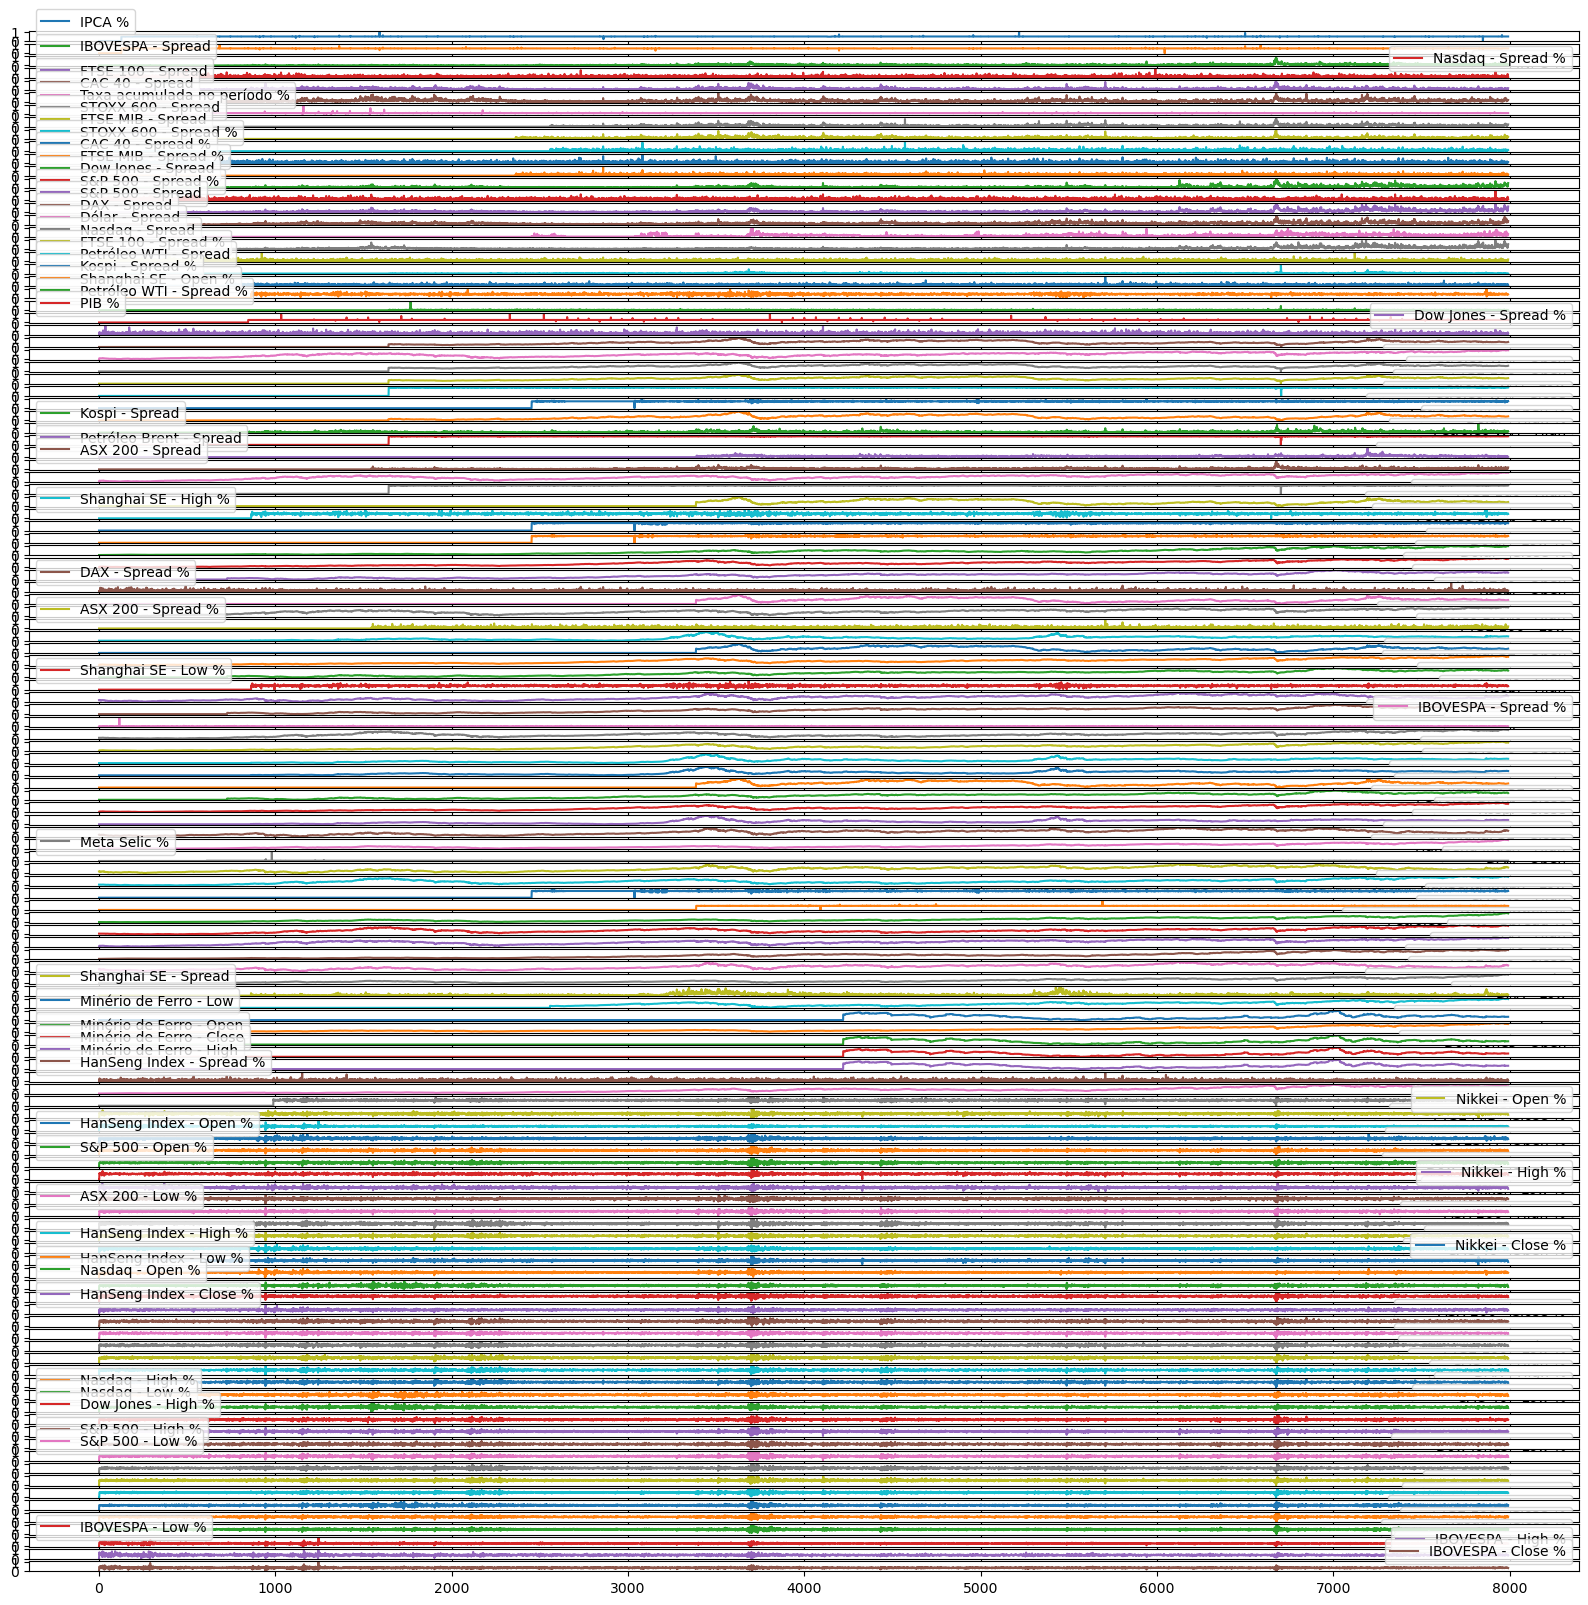

In [197]:
df_x_values.plot(subplots=True, figsize=(20, 20))

Dividir os dados em treino e teste

In [198]:
column_indices = {name: i for i, name in enumerate(df_x_values.columns)}

# n = len(df_x_values)
# train_df = df_x_values[0:int(n*0.7)]
# val_df = df_x_values[int(n*0.7):int(n*0.9)]
# test_df = df_x_values[int(n*0.9):]

dias_uteis_ano = int(365/7*5) #dias de bolsa aberta
# anos_val = 2.5 #2020 - 2022.5
# anos_test = 1.5 #
# train_df = df_x_values[0:-dias_uteis_ano*3] # todos os dados de antes do ano atual -3 anos, no caso dados antes de 2021
# val_df = df_x_values[-dias_uteis_ano*3:-dias_uteis_ano] # os dois anos antes do ultimo anos, ou seja de ano atual -3 a ano atual -1
# test_df = df_x_values[-dias_uteis_ano:] # último ano
train_df = df_x_values[0:-dias_uteis_ano*1] # todos os dados de antes do ano atual -3 anos, no caso dados antes de 2021
val_df = df_x_values[-dias_uteis_ano*1:-int(dias_uteis_ano*.4)] # os dois anos antes do ultimo anos, ou seja de ano atual -3 a ano atual -1
test_df = df_x_values[-int(dias_uteis_ano*.4):] # último ano


num_features = df_x_values.shape[1]

In [163]:
train_df

,IPCA %,INPC %,IBOVESPA - Spread,Nasdaq - Spread %,FTSE 100 - Spread,CAC 40 - Spread,Taxa acumulada no período %,STOXX 600 - Spread,FTSE MIB - Spread,STOXX 600 - Spread %,...,S&P 500 - Low %,DAX - Close %,CAC 40 - Close %,FTSE 100 - Close %,Nasdaq - Close %,Dow Jones - Close %,S&P 500 - Close %,IBOVESPA - Low %,IBOVESPA - High %,IBOVESPA - Close %
0,0.000000,0.00,0.000307,0.000000,0.000000,0.082854,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.00,0.001138,0.029525,0.067476,0.022760,0.000000,0.000000,0.000000,0.000000,...,0.481798,0.471632,0.493122,0.000000,0.482289,0.562057,0.521794,0.342067,0.561647,0.430696
2,0.000000,0.00,0.002016,0.119266,0.056125,0.081064,0.000000,0.000000,0.000000,0.000000,...,0.498980,0.468361,0.477157,0.483486,0.483429,0.548373,0.514572,0.412974,0.677350,0.425090
3,0.000000,0.00,0.001433,0.056198,0.075201,0.071602,0.000000,0.000000,0.000000,0.000000,...,0.494273,0.512026,0.571796,0.558993,0.476500,0.537624,0.504670,0.407537,0.461538,0.432572
4,0.000000,0.00,0.001854,0.182793,0.068422,0.108937,0.000000,0.000000,0.000000,0.000000,...,0.480938,0.525925,0.584374,0.585995,0.477288,0.550420,0.533829,0.414793,0.607949,0.468392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728,0.489362,0.52,0.028435,0.116326,0.067791,0.144023,0.148257,0.081996,0.104121,0.115216,...,0.465797,0.530561,0.523297,0.516892,0.454863,0.515220,0.495608,0.304712,0.351338,0.319603
7729,0.489362,0.52,0.036139,0.130862,0.059278,0.112747,0.148257,0.077540,0.051699,0.088032,...,0.466970,0.546196,0.540804,0.533160,0.449210,0.528862,0.496691,0.304244,0.375560,0.320050
7730,0.489362,0.52,0.092179,0.088370,0.063692,0.123565,0.148257,0.061498,0.058930,0.073831,...,0.492318,0.539034,0.533914,0.525597,0.484442,0.582207,0.545199,0.300988,0.391601,0.334397
7731,0.489362,0.52,0.065754,0.036247,0.061958,0.102238,0.148257,0.043078,0.048445,0.065209,...,0.515690,0.521221,0.523984,0.537527,0.460435,0.537037,0.513311,0.323058,0.392744,0.327740


In [164]:
val_df

,IPCA %,INPC %,IBOVESPA - Spread,Nasdaq - Spread %,FTSE 100 - Spread,CAC 40 - Spread,Taxa acumulada no período %,STOXX 600 - Spread,FTSE MIB - Spread,STOXX 600 - Spread %,...,S&P 500 - Low %,DAX - Close %,CAC 40 - Close %,FTSE 100 - Close %,Nasdaq - Close %,Dow Jones - Close %,S&P 500 - Close %,IBOVESPA - Low %,IBOVESPA - High %,IBOVESPA - Close %
7733,0.489362,0.52,0.113487,0.235789,0.061958,0.102238,0.148257,0.043078,0.048445,0.093091,...,0.462757,0.517695,0.523464,0.524989,0.469055,0.507268,0.500028,0.299006,0.384291,0.303442
7734,0.489362,0.52,0.059193,0.061567,0.129749,0.316736,0.148257,0.224896,0.211497,0.485995,...,0.431600,0.469806,0.484098,0.514364,0.429055,0.490876,0.477852,0.305115,0.349567,0.330080
7735,0.489362,0.52,0.090975,0.153771,0.078827,0.080015,0.148257,0.076055,0.073030,0.031481,...,0.492164,0.537266,0.535621,0.526388,0.473653,0.527611,0.513203,0.299125,0.377473,0.317460
7736,0.489362,0.52,0.147315,0.264067,0.076147,0.112211,0.148257,0.064469,0.058930,0.078910,...,0.427802,0.525850,0.522585,0.548407,0.412096,0.476362,0.456229,0.322283,0.428392,0.322894
7737,0.489362,0.52,0.062383,0.047996,0.136686,0.089297,0.148257,0.131016,0.089660,0.189184,...,0.493166,0.465268,0.476262,0.485824,0.511955,0.564891,0.555675,0.294570,0.318235,0.311048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7884,0.489362,0.52,0.064430,0.240690,0.166325,0.265950,0.148257,0.148842,0.124367,0.107216,...,0.460347,0.506098,0.497605,0.486531,0.494642,0.517134,0.515423,0.318835,0.385388,0.313661
7885,0.489362,0.52,0.033250,0.069318,0.096326,0.218641,0.148257,0.181818,0.152928,0.113715,...,0.489766,0.469760,0.476489,0.489746,0.443910,0.523221,0.494567,0.303399,0.357159,0.319724
7886,0.489362,0.52,0.069486,0.192041,0.131168,0.177675,0.148257,0.192514,0.138829,0.098567,...,0.374470,0.478201,0.478698,0.495700,0.361042,0.495208,0.429577,0.294167,0.370394,0.306740
7887,0.489362,0.52,0.110176,0.041951,0.145987,0.174554,0.148257,0.199940,0.174982,0.096682,...,0.501166,0.557037,0.557538,0.564934,0.495249,0.560601,0.525940,0.282826,0.352868,0.296207


In [165]:
test_df

,IPCA %,INPC %,IBOVESPA - Spread,Nasdaq - Spread %,FTSE 100 - Spread,CAC 40 - Spread,Taxa acumulada no período %,STOXX 600 - Spread,FTSE MIB - Spread,STOXX 600 - Spread %,...,S&P 500 - Low %,DAX - Close %,CAC 40 - Close %,FTSE 100 - Close %,Nasdaq - Close %,Dow Jones - Close %,S&P 500 - Close %,IBOVESPA - Low %,IBOVESPA - High %,IBOVESPA - Close %
7889,0.489362,0.52000,0.064731,0.098034,0.099007,0.145812,0.148257,0.095959,0.130875,0.094257,...,0.506422,0.541647,0.543963,0.518027,0.518863,0.574226,0.560625,0.330765,0.380605,0.323411
7890,0.489362,0.52000,0.111139,0.137281,0.240896,0.577906,0.091232,0.396316,0.412148,0.384470,...,0.623057,0.470036,0.501854,0.521621,0.576466,0.679176,0.615922,0.293499,0.373797,0.316164
7891,0.489362,0.52000,0.115052,0.073366,0.078669,0.224831,0.148257,0.139632,0.159436,0.032798,...,0.560823,0.589504,0.555858,0.509618,0.521914,0.532085,0.540109,0.315647,0.393457,0.310868
7892,0.489362,0.52000,0.160858,0.030657,0.143308,0.263240,0.148257,0.168152,0.142082,0.112105,...,0.509138,0.485573,0.473548,0.484482,0.468444,0.556584,0.524516,0.269673,0.332664,0.292128
7893,0.482903,0.50776,0.047395,0.192263,0.112093,0.146477,0.148257,0.145572,0.125090,0.080590,...,0.490286,0.569013,0.574715,0.556568,0.467396,0.560603,0.512685,0.311883,0.335279,0.321838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7988,0.489362,0.52000,0.129077,0.051859,0.117137,0.235212,0.148257,0.155377,0.150036,0.091002,...,0.523023,0.565290,0.569311,0.539409,0.482331,0.532545,0.515254,0.311724,0.403554,0.332694
7989,0.489362,0.52000,0.055040,0.396368,0.084659,0.242680,0.148257,0.153893,0.208966,0.092202,...,0.415497,0.468136,0.482496,0.539366,0.388036,0.519313,0.461226,0.317862,0.363864,0.328091
7990,0.489362,0.52000,0.085678,0.051215,0.116033,0.207544,0.148257,0.131610,0.274042,0.079611,...,0.457322,0.488008,0.501923,0.511932,0.445021,0.517102,0.494539,0.312847,0.400160,0.330780
7991,0.489362,0.52000,0.109935,0.207338,0.082926,0.187008,0.148257,0.179143,0.166305,0.126712,...,0.381789,0.477180,0.483959,0.520978,0.363074,0.462478,0.424813,0.289405,0.356876,0.302114


In [166]:
num_features

126

Criar a classe/função geradora das janelas

In [167]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
      plt.subplot(max_n, 1, n+1)
      plt.ylabel(f'{plot_col} [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        # shuffle=False,
        shuffle=True,
        seed=42,
        batch_size=32,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)

  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.train))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [168]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + 3 * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Criação da função de treino da rede

In [169]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
                optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError()
                  ]) #, tf.keras.metrics.R2Score()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close %']

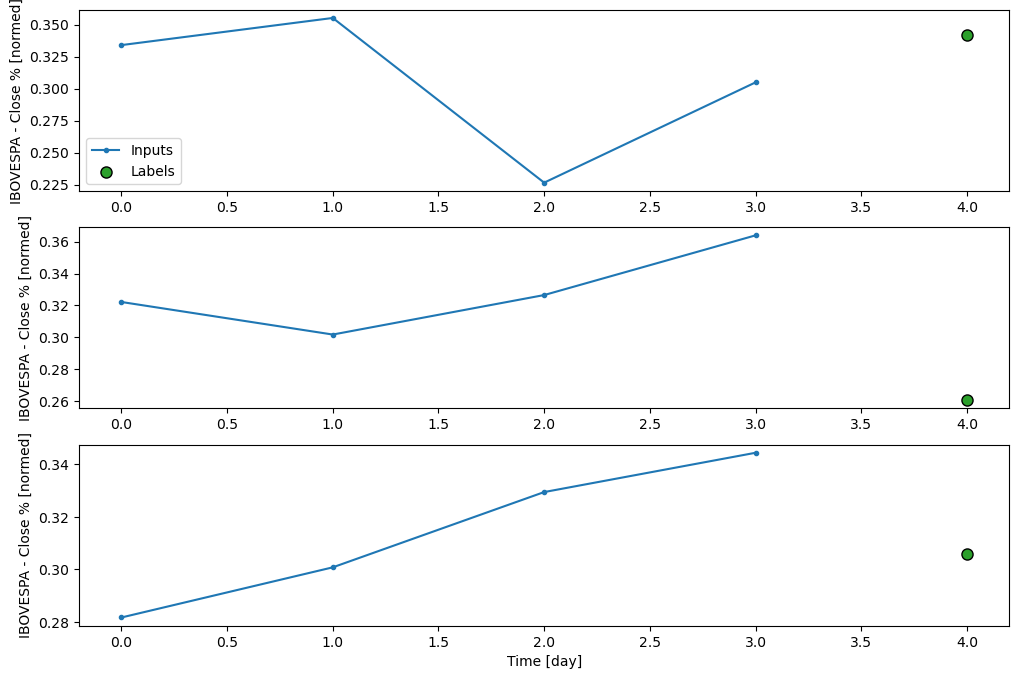

In [170]:
INPUT_WIDTH = 4
OUTPUT_WIDTH = 1
label_columns=['IBOVESPA - Close %']

multi_window = WindowGenerator(input_width=INPUT_WIDTH,
                               label_width=OUTPUT_WIDTH,
                               shift=OUTPUT_WIDTH, label_columns=label_columns)

multi_window.plot(plot_col="IBOVESPA - Close %")
multi_window

In [171]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 126), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

In [172]:
MAX_EPOCHS = 500

PATIENCE = 2 #int(MAX_EPOCHS*0.05)
LEARNING_RATE = 10**-6 # 0.000001
LSTM_units = 50

In [200]:
print(f"EPOCHS: {MAX_EPOCHS} - LEARNING_RATE: {LEARNING_RATE} - LSTM_units: {LSTM_units} - PATIENCE: {PATIENCE}")
print(f"INPUT_WIDTH: {INPUT_WIDTH} - OUTPUT_WIDTH: {OUTPUT_WIDTH} - N FEATURES: {num_features}")

EPOCHS: 500 - LEARNING_RATE: 1e-06 - LSTM_units: 50 - PATIENCE: 2
INPUT_WIDTH: 4 - OUTPUT_WIDTH: 1 - N FEATURES: 126


Epoch 1/500
242/242 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.1063 - mean_absolute_error: 0.3232 - mean_absolute_percentage_error: 108.4575 - mean_squared_error: 0.1063 - root_mean_squared_error: 0.3260 - val_loss: 0.1028 - val_mean_absolute_error: 0.3203 - val_mean_absolute_percentage_error: 99.6101 - val_mean_squared_error: 0.1028 - val_root_mean_squared_error: 0.3206
Epoch 2/500
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1057 - mean_absolute_error: 0.3223 - mean_absolute_percentage_error: 112.0909 - mean_squared_error: 0.1057 - root_mean_squared_error: 0.3251 - val_loss: 0.1018 - val_mean_absolute_error: 0.3187 - val_mean_absolute_percentage_error: 99.1289 - val_mean_squared_error: 0.1018 - val_root_mean_squared_error: 0.3191
Epoch 3/500
242/242 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1048 - mean_absolute_error: 0.3210 - mean_absolute_percentage_error: 132.2805 - mean_squared_error: 0.1048 - root_mean_squared_error: 0.3238 - val_loss: 0.1006 - val_mean_absolute_error

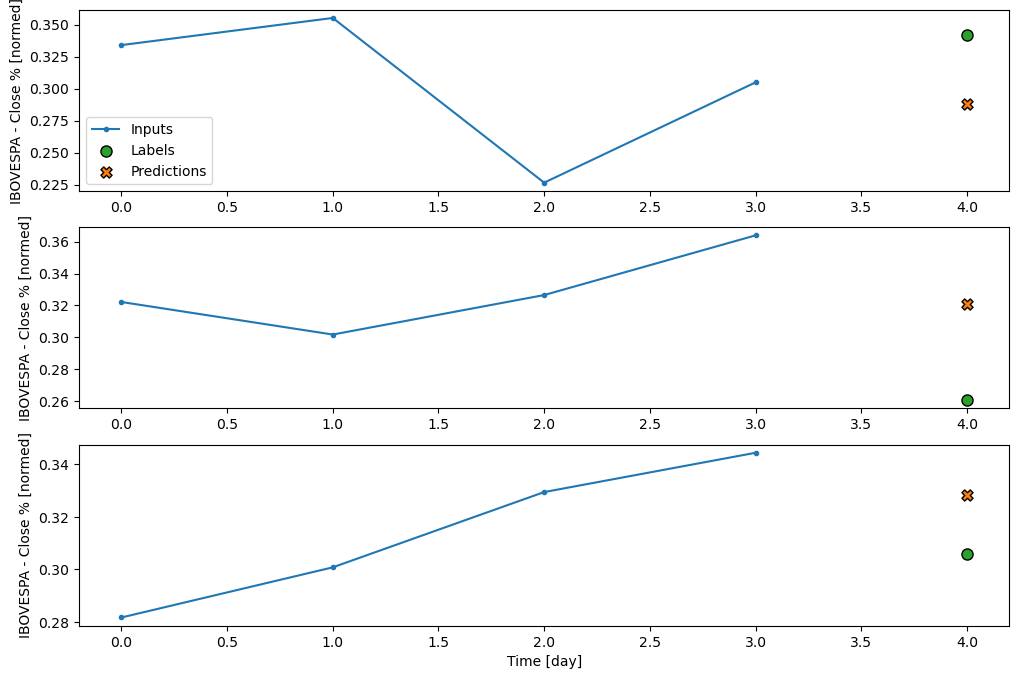

In [173]:
# record start time
start = time.time()

# performance_label = f"LSTM - in={INPUT_WIDTH} - out={OUTPUT_WIDTH} - nodes={LSTM_units} - e={MAX_EPOCHS} - lr={LEARNING_RATE} - p={PATIENCE} - cols={df_x_values.columns} (MSE, MAPE, RMSE)"
# num_features = 1

multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(LSTM_units, return_sequences=True), #, dropout=0.05),
    tf.keras.layers.LSTM(LSTM_units, return_sequences=False),#, dropout=0.05),
    # tf.keras.layers.Dropout(0.2),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense( OUTPUT_WIDTH*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUTPUT_WIDTH, num_features])
    # tf.keras.layers.Dense(units=num_features)

])

history = compile_and_fit(multi_lstm_model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# IPython.display.clear_output()

# record end time
end = time.time()

# [performance_label] = multi_lstm_model.evaluate(multi_window.train, verbose=0)
multi_window.plot(multi_lstm_model, plot_col="IBOVESPA - Close %")

In [174]:
timeMillisec = (end-start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:35s:431ms


Calculate metrics

In [175]:
import json
# modelName, 
def addMetricsToFile(loss, mae, mse, mape, rmse, sample, predictColumn, inputColumns, nInputs, nOutputs, nEpochs, patience, learningRate):
    # try to load file "3 - results/experiment_1/metrics.json"
    try:
        with open("data/3 - results/experiment_1/metrics.json", "r") as f:
            metrics_results = json.load(f)
    except FileNotFoundError:
        metrics_results = []
    except json.JSONDecodeError:
        metrics_results = []
    # add new metrics to the list
    metrics_results.append({
        "loss": loss,
        "mae": mae,
        "mse": mse,
        "mape": mape,
        "rmse": rmse,
        "sample": sample,
        # "modelName": modelName,
        "predictColumn": predictColumn,
        "inputColumns": inputColumns,
        "nInputs": nInputs,
        "nOutputs": nOutputs,
        "nEpochs": nEpochs,
        "patience": patience,
        "learningRate": learningRate
    })
    # save the file
    with open("data/3 - results/experiment_1/metrics.json", "w") as f:
        json.dump(metrics_results, f, indent=4)
    # print the file

In [176]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data, column):
    predictions = data[column].values[:-1]
    labels = data[column].values[1:]
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [177]:
def make_repeat_predictions_metrics(data, sample, predictColumn):
    predictions = create_df_repeat_prediction(data, predictColumn)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    addMetricsToFile(
        loss='NaN',
        mae=float(mae.result()),
        mse=float(mse.result()),
        mape=float(mape.result()),
        rmse=float(rmse.result()),
        sample=sample,
        predictColumn=predictColumn,
        inputColumns=columns,
        # modelName='model_1',
        nInputs=INPUT_WIDTH,
        nOutputs=OUTPUT_WIDTH,
        nEpochs=MAX_EPOCHS,
        patience=PATIENCE,
        learningRate=LEARNING_RATE
    )
    print(f"Sample: {sample}")
    print(f"MAE: {mae.result():.4f} - MSE: {mse.result():.4f} - MAPE: {mape.result():.4f} - RMSE: {rmse.result():.4f}")


In [178]:
def make_model_predictions_metrics(data, sample, predictColumn):
    loss, mae, mse, mape, rmse = multi_lstm_model.evaluate(data)
    addMetricsToFile(
        loss=loss,
        mae=mae,
        mse=mse,
        mape=mape,
        rmse=rmse,
        sample=sample,
        predictColumn=predictColumn,
        inputColumns=columns,
        # modelName='model_1',
        nInputs=INPUT_WIDTH,
        nOutputs=OUTPUT_WIDTH,
        nEpochs=MAX_EPOCHS,
        patience=PATIENCE,
        learningRate=LEARNING_RATE
    )
    print(f"Sample: {sample}")
    print(f"Loss: {loss:.4f} - MAE: {mae:.4f} - MSE: {mse:.4f} - MAPE: {mape:.4f} - RMSE: {rmse:.4f}")

In [179]:
predictColumn = "IBOVESPA - Close %"
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {predictColumn} - N Inputs: {INPUT_WIDTH} - N Outputs: {OUTPUT_WIDTH}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
make_model_predictions_metrics(multi_window.train, "Train", predictColumn)
make_model_predictions_metrics(multi_window.val, "Validation", predictColumn)
make_model_predictions_metrics(multi_window.test, "Test", predictColumn)
make_repeat_predictions_metrics(train_df, "Train_Repeat", predictColumn)
make_repeat_predictions_metrics(val_df, "Validation_Repeat", predictColumn)
make_repeat_predictions_metrics(test_df, "Test_Repeat", predictColumn)

Learning Rate: 1e-06 - Epochs: 500 - Patience: 2
Predict Column: IBOVESPA - Close % - N Inputs: 4 - N Outputs: 1
Input Columns: ['IPCA %', 'INPC %', 'IBOVESPA - Spread', 'Nasdaq - Spread %', 'FTSE 100 - Spread', 'CAC 40 - Spread', 'Taxa acumulada no período %', 'STOXX 600 - Spread', 'FTSE MIB - Spread', 'STOXX 600 - Spread %', 'CAC 40 - Spread %', 'FTSE MIB - Spread %', 'Dow Jones - Spread', 'S&P 500 - Spread %', 'S&P 500 - Spread', 'DAX - Spread', 'Dólar - Spread', 'Nasdaq - Spread', 'FTSE 100 - Spread %', 'Petróleo WTI - Spread', 'Kospi - Spread %', 'Shanghai SE - Open %', 'Petróleo WTI - Spread %', 'PIB %', 'Dow Jones - Spread %', 'Petróleo WTI - Open', 'FTSE 100 - Open', 'Petróleo WTI - Low', 'Petróleo WTI - Close', 'Petróleo WTI - Open %', 'Dólar - High %', 'Petróleo WTI - High', 'Kospi - Spread', 'Petróleo WTI - Low %', 'Petróleo Brent - Spread', 'ASX 200 - Spread', 'FTSE 100 - High', 'Petróleo WTI - Close %', 'Petróleo Brent - Open', 'Shanghai SE - High %', 'Dólar - Low %', 'Dól

Salvar estado e continuar mais algumas rodadas de treino

In [180]:
# Save the model com prioridade para as melhores, até atingir o objetivo
multi_lstm_model.save('models/multi_lstm_model.keras')  # The file needs to end with the .keras extension

In [181]:
historyComp = history

Plot loss evolution with matplotlib.pyplot

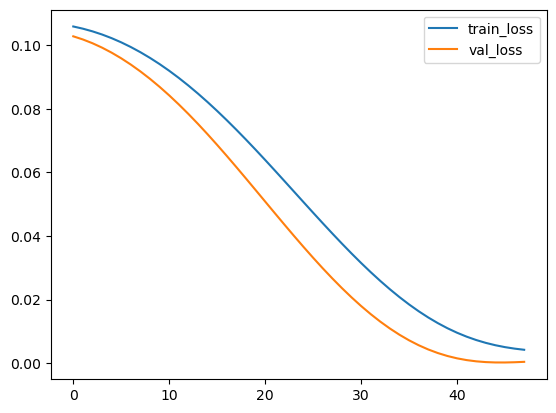

In [182]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

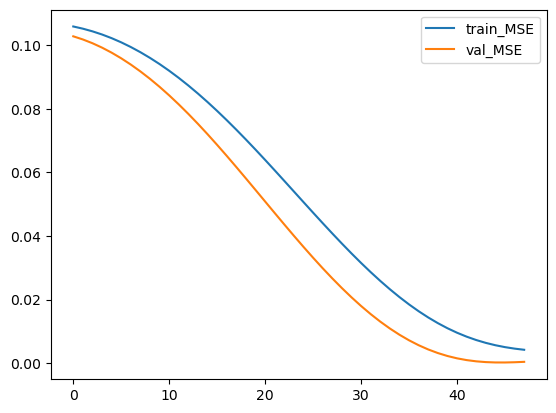

In [183]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.legend()
plt.show()

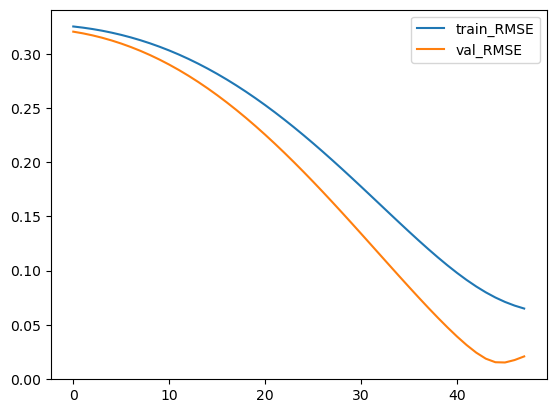

In [184]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.legend()
plt.show()

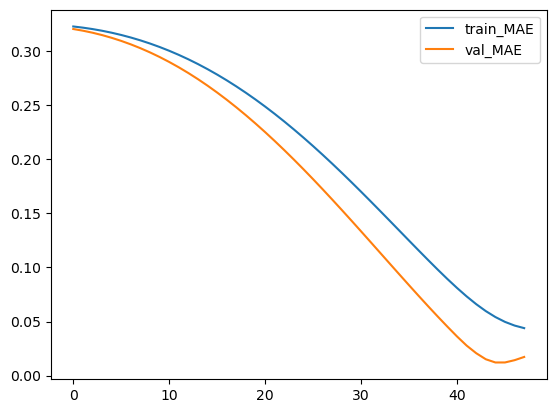

In [185]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.legend()
plt.show()

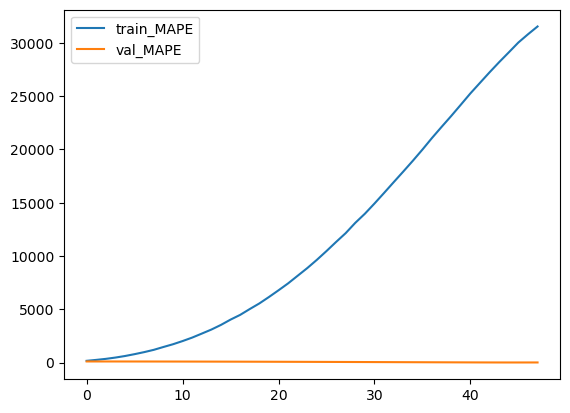

In [186]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.legend()
plt.show()

Fazer uma predição

2025-04-08 15:16:35.872790: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


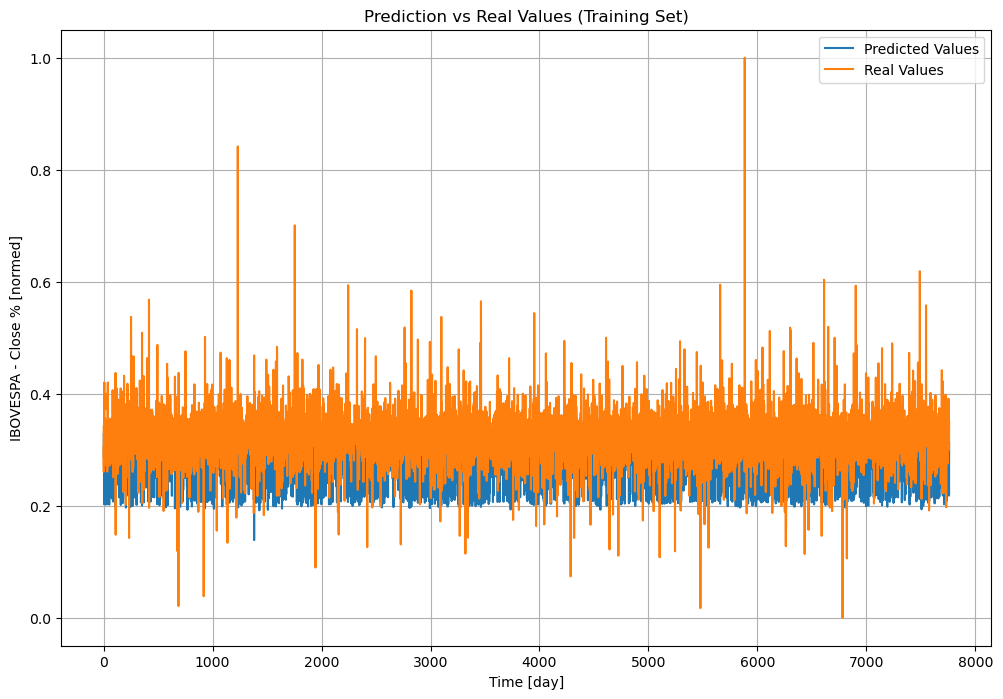

In [187]:
inputs, labels = next(iter(multi_window.train))
for train in iter(multi_window.train):
  inputs = np.concatenate((inputs, train[0]), axis=0)
  labels = np.concatenate((labels, train[1]), axis=0)
prediction = multi_lstm_model(inputs)
plt.plot(prediction[:, 0, 1])
plt.plot(labels[:, 0, 0])
# add legend
plt.legend([
  'Predicted Values', 
  'Real Values'
  ])
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{predictColumn} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
plt.show()

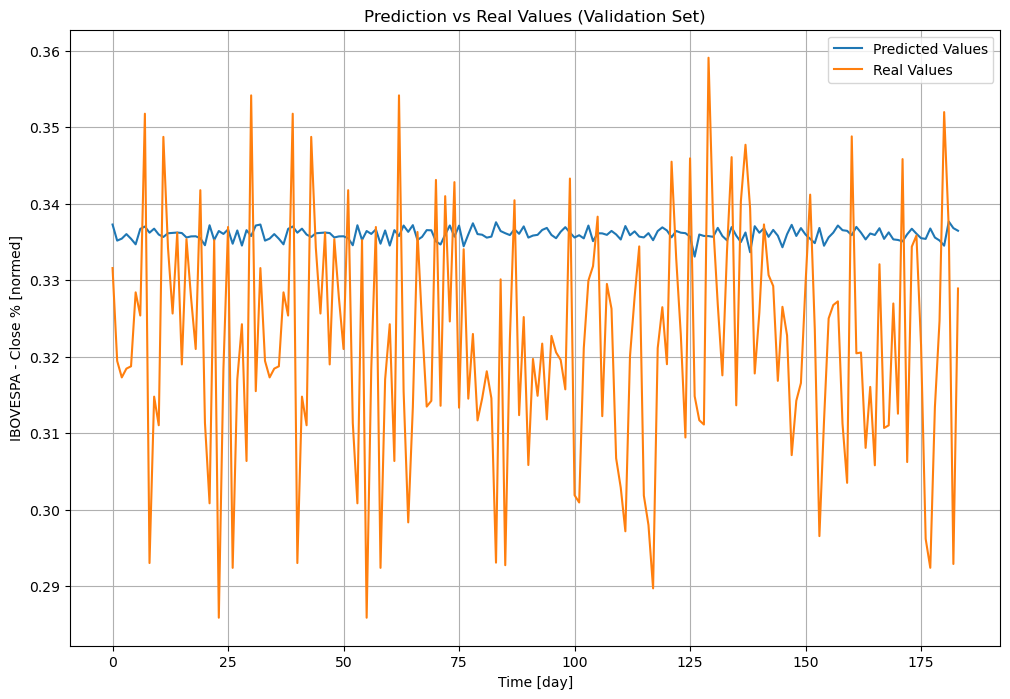

In [188]:
inputs, labels = next(iter(multi_window.val))
for val in iter(multi_window.val):
  inputs = np.concatenate((inputs, val[0]), axis=0)
  labels = np.concatenate((labels, val[1]), axis=0)
prediction = multi_lstm_model(inputs)
plt.plot(prediction[:, 0, 1])
plt.plot(labels[:, 0, 0])
# add legend
plt.legend([
  'Predicted Values', 
  'Real Values'
  ])
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{predictColumn} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
plt.show()

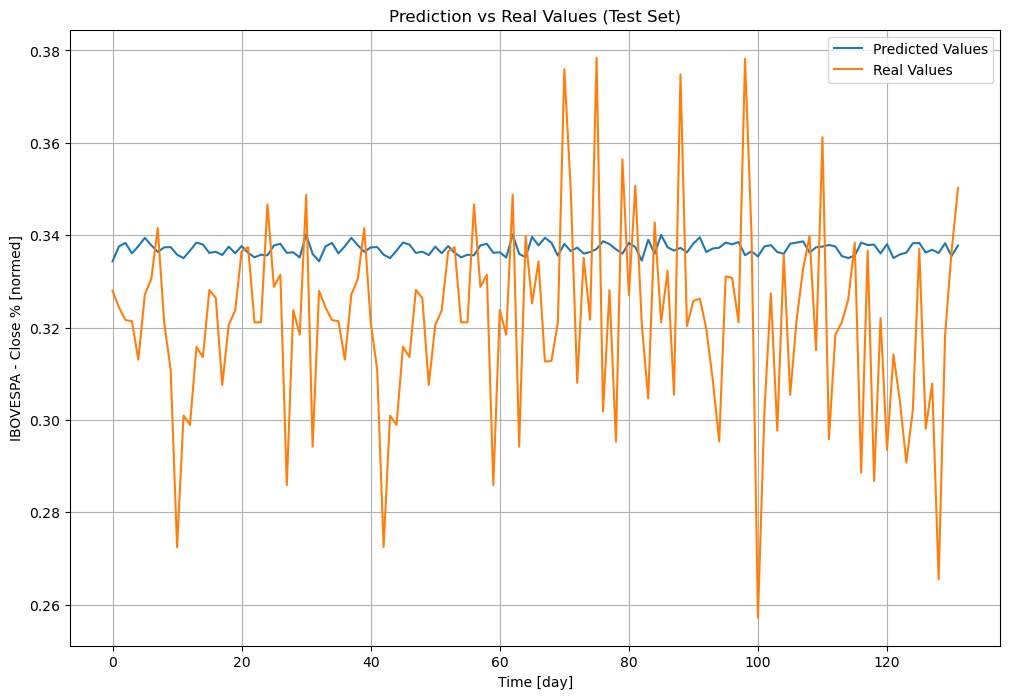

In [189]:
inputs, labels = next(iter(multi_window.test))
for test in iter(multi_window.test):
  inputs = np.concatenate((inputs, test[0]), axis=0)
  labels = np.concatenate((labels, test[1]), axis=0)
prediction = multi_lstm_model(inputs)
plt.plot(prediction[:, 0, 1])
plt.plot(labels[:, 0, 0])
# add legend
plt.legend([
  'Predicted Values', 
  'Real Values'
  ])
plt.title('Prediction vs Real Values (Test Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{predictColumn} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
plt.show()

In [190]:
labels[:, 0, 0]

array([0.3279591 , 0.32434285, 0.3216269 , 0.32137495, 0.31306073,
       0.32714227, 0.33051765, 0.34152535, 0.32113847, 0.31092075,
       0.27246624, 0.3009353 , 0.29892862, 0.31582636, 0.3136085 ,
       0.32813552, 0.32636967, 0.30756563, 0.32054144, 0.3237192 ,
       0.33650652, 0.3373945 , 0.32113847, 0.32113847, 0.34665626,
       0.32881448, 0.33143637, 0.28591228, 0.32378754, 0.31847015,
       0.348754  , 0.2942171 , 0.3279591 , 0.32434285, 0.3216269 ,
       0.32137495, 0.31306073, 0.32714227, 0.33051765, 0.34152535,
       0.32113847, 0.31092075, 0.27246624, 0.3009353 , 0.29892862,
       0.31582636, 0.3136085 , 0.32813552, 0.32636967, 0.30756563,
       0.32054144, 0.3237192 , 0.33650652, 0.3373945 , 0.32113847,
       0.32113847, 0.34665626, 0.32881448, 0.33143637, 0.28591228,
       0.32378754, 0.31847015, 0.348754  , 0.2942171 , 0.33984753,
       0.32524094, 0.334317  , 0.31266093, 0.31275538, 0.32113847,
       0.37595356, 0.3496707 , 0.30802578, 0.33508644, 0.32171

In [191]:
prediction[:, 0, :]

<tf.Tensor: shape=(132, 126), dtype=float32, numpy=
array([[0.33435756, 0.33435756, 0.33435756, ..., 0.33435756, 0.33435756,
        0.33435756],
       [0.33758727, 0.33758727, 0.33758727, ..., 0.33758727, 0.33758727,
        0.33758727],
       [0.33832404, 0.33832404, 0.33832404, ..., 0.33832404, 0.33832404,
        0.33832404],
       ...,
       [0.33826497, 0.33826497, 0.33826497, ..., 0.33826497, 0.33826497,
        0.33826497],
       [0.33550647, 0.33550647, 0.33550647, ..., 0.33550647, 0.33550647,
        0.33550647],
       [0.33776566, 0.33776566, 0.33776566, ..., 0.33776566, 0.33776566,
        0.33776566]], shape=(132, 126), dtype=float32)>

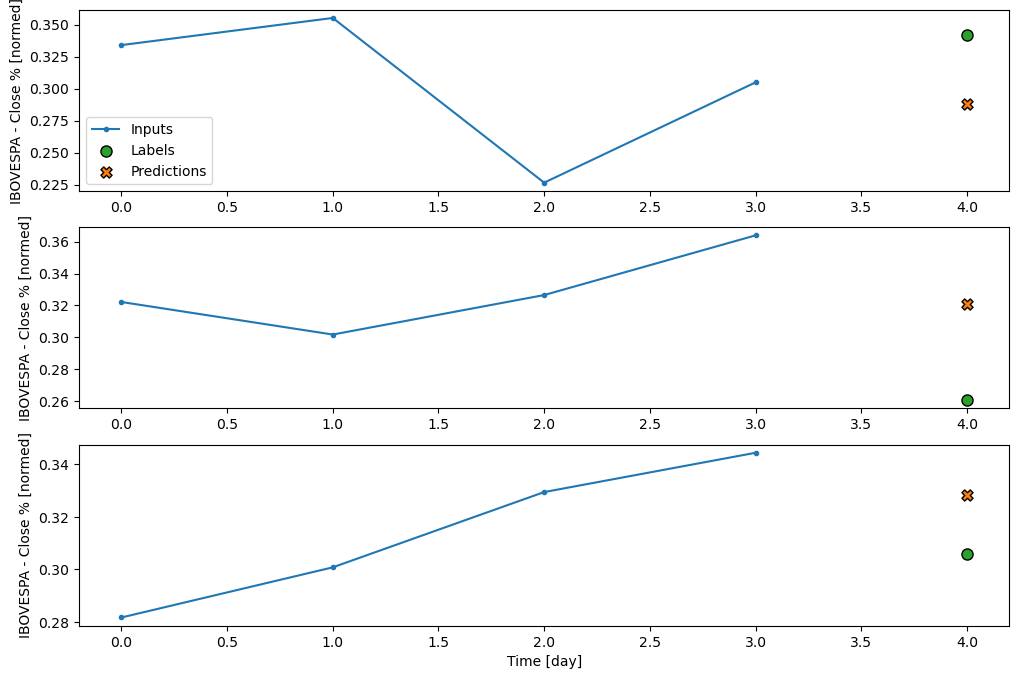

In [192]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(multi_lstm_model, plot_col="IBOVESPA - Close %")

Salvar e carregar modelo

In [193]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')